In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
# import the dataset
data = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


# DATA CLEANING

In [4]:
# chech for null values
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0


In [5]:
# drop null values
data = data.copy()
data.dropna(inplace=True)

In [6]:
# check for duplicates
data.duplicated().sum()

np.int64(2)

In [7]:
data[data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [8]:
# convert some columns dtypes
data['HasCrCard'] = data['HasCrCard'].astype('int64')
data['IsActiveMember'] = data['IsActiveMember'].astype('int64')
data['NumOfProducts'] = data['NumOfProducts'].astype('float64')
data['CreditScore'] = data['CreditScore'].astype('float64')

In [9]:
# drop unimportant columns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

## EXPLORATORY DATA ANALYSIS

In [10]:
# check the statistics summary
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,650.529606,38.920287,5.013003,76481.490819,1.530206,0.705541,0.514803,100099.786455,0.203841
std,96.633003,10.487986,2.892152,62393.187035,0.581669,0.455822,0.499806,57510.939962,0.402872
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100218.210000,0.000000
75%,718.000000,44.000000,7.000000,127641.417500,2.000000,1.000000,1.000000,149395.882500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [11]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2,0.00,1.0,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3.0,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2.0,0,0,93826.63,0
5,645.0,Spain,Male,44.0,8,113755.78,2.0,1,0,149756.71,1


In [12]:
numeric_cols = data.select_dtypes(include='number')
numeric_cols.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.004233,0.000779,0.006580,0.012412,-0.005795,0.025125,-0.001256,-0.026790
Age,-0.004233,1.000000,-0.010116,0.028376,-0.030762,-0.011716,0.085485,-0.006939,0.285448
Tenure,0.000779,-0.010116,1.000000,-0.011986,0.013205,0.022557,-0.028090,0.007835,-0.014208
Balance,0.006580,0.028376,-0.011986,1.000000,-0.304163,-0.014678,-0.010323,0.012637,0.118564
NumOfProducts,0.012412,-0.030762,0.013205,-0.304163,1.000000,0.003368,0.009644,0.014378,-0.047621
HasCrCard,-0.005795,-0.011716,0.022557,-0.014678,0.003368,1.000000,-0.012039,-0.009924,-0.007023
IsActiveMember,0.025125,0.085485,-0.028090,-0.010323,0.009644,-0.012039,1.000000,-0.011022,-0.156072
EstimatedSalary,-0.001256,-0.006939,0.007835,0.012637,0.014378,-0.009924,-0.011022,1.000000,0.011981
Exited,-0.026790,0.285448,-0.014208,0.118564,-0.047621,-0.007023,-0.156072,0.011981,1.000000


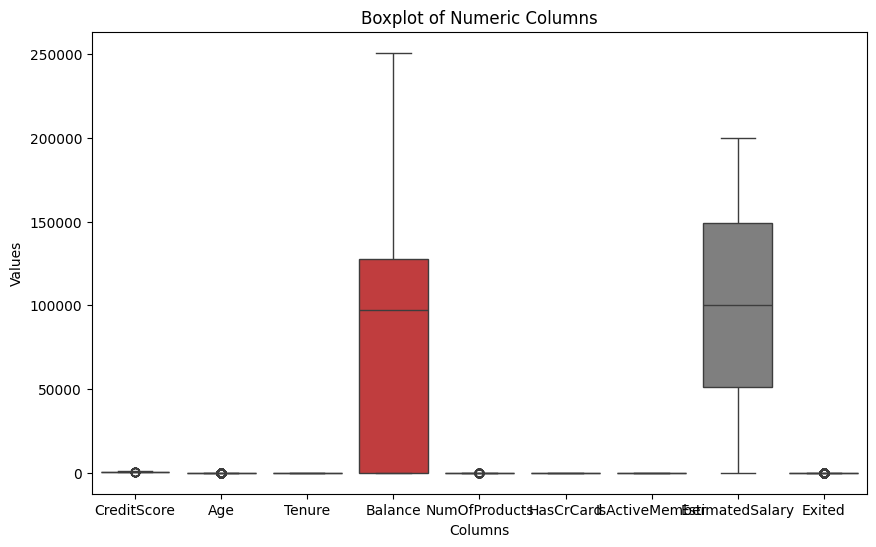

In [13]:
# create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_cols.columns])
plt.title('Boxplot of Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [14]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2,0.00,1.0,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3.0,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2.0,0,0,93826.63,0
5,645.0,Spain,Male,44.0,8,113755.78,2.0,1,0,149756.71,1


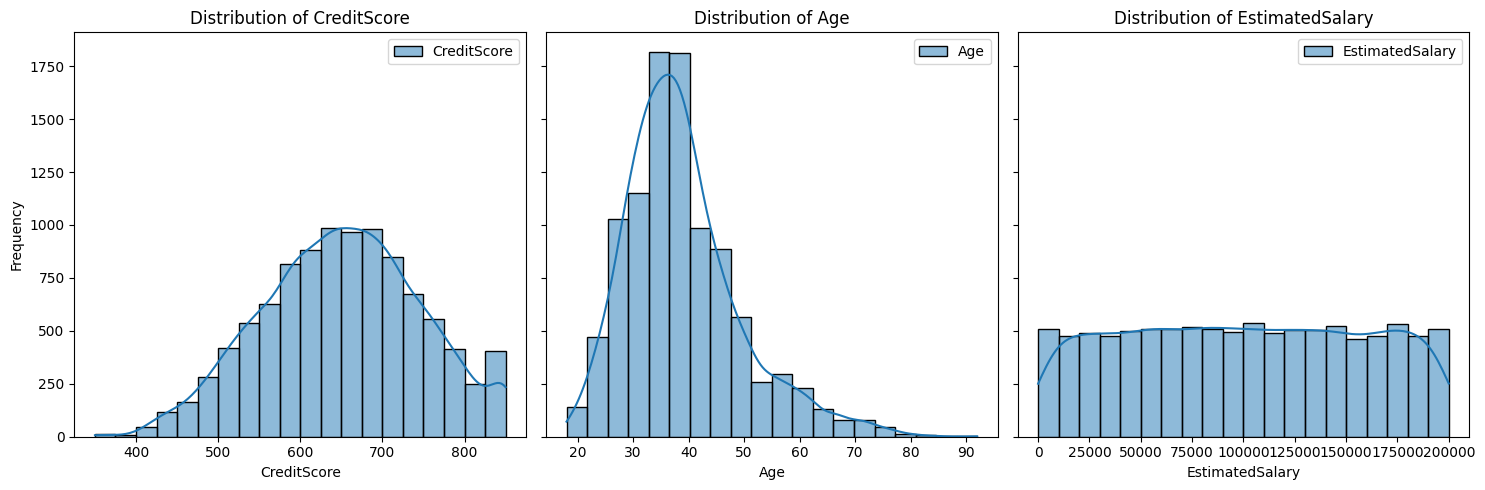

In [15]:
# put the new dataset into a list and create a label
data_list = [data['CreditScore'], data['Age'], data['EstimatedSalary'] ]
labels = ['CreditScore', 'Age', 'EstimatedSalary']

def plot_hist(data_list, labels):
    """
    Create histograms for each dataset in the list and display as subplots
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    axes = axes.flatten()

    # Enumerate, zip the dataset from list and create 2x2 subplots
    for ax, data_col, label in zip(axes, data_list, labels):
        sns.histplot(data_col, label=label, bins=20, alpha=0.5, kde=True, ax=ax)
        ax.set_xlabel(label)
        ax.set_title(f'Distribution of {label}')
        ax.set_ylabel('Frequency')
        ax.legend()

    plt.tight_layout()

    # display the function
    plt.show()
    return

plot_hist(data_list, labels)

In [16]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2,0.00,1.0,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3.0,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2.0,0,0,93826.63,0
5,645.0,Spain,Male,44.0,8,113755.78,2.0,1,0,149756.71,1


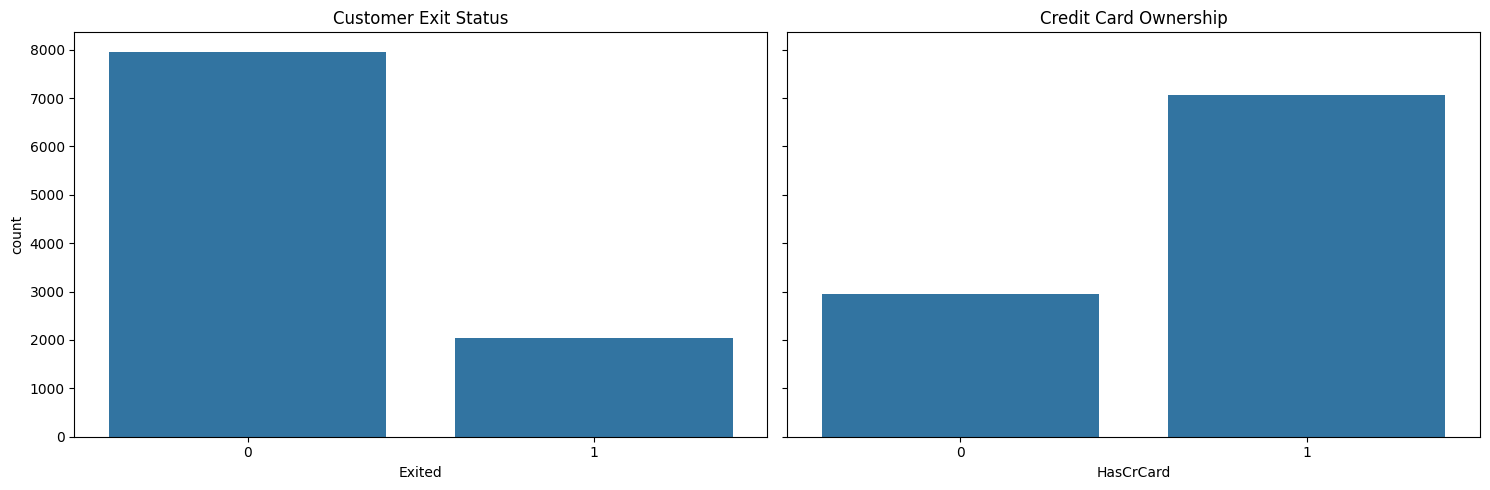

In [17]:
# graphic visualisation of exited and those that have creditcard
def checkmate():
  """ function that showcase the graphic visualisation of exited and those that have creditcard
  """
  fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
  axes = axes.flatten()
  sns.countplot(x='Exited', data=data, ax=axes[0])
  sns.countplot(x='HasCrCard', data=data, ax=axes[1])
  axes[0].set_title('Customer Exit Status')
  axes[1].set_title('Credit Card Ownership')
  plt.tight_layout()
  plt.show()
  return

checkmate()

#sns.countplot(x='Exited', data=data)
#plt.show()

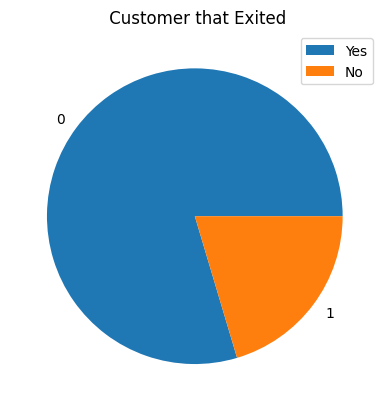

In [18]:
# pie chart visualization of the exited
data['Exited'].value_counts().plot(kind='pie')
plt.title(' Customer that Exited')
plt.ylabel('')
plt.legend(['Yes', 'No'])
plt.show()

In [19]:
data.groupby('Exited')['Gender'].value_counts()

Exited  Gender
0       Male      4556
        Female    3404
1       Female    1139
        Male       899
Name: count, dtype: int64

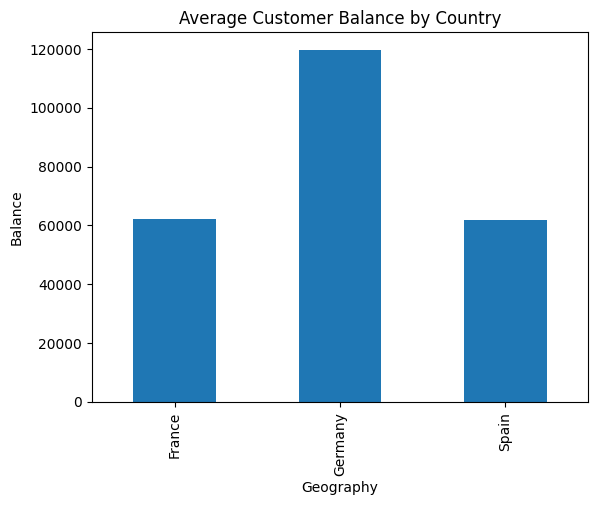

In [20]:
# barchart showing the geography and the balance
data.groupby('Geography')['Balance'].mean().plot(kind='bar')
plt.title('Average Customer Balance by Country')
plt.ylabel('Balance')
plt.show()

## Train-test-split

In [21]:
# change the gender category to numeric
# male = 1, female = 0
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [22]:
X = data.drop('Exited', axis = 1)
y = data['Exited']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
# split into categorical and numerical variable in X
categorical_column = X.select_dtypes(include=['object']).columns
numerical_column = X.select_dtypes(include=['float64','int64']).columns

In [25]:
categorical_column

Index(['Geography'], dtype='object')

In [26]:
# Assign the OneHotEncoder to the X train and X test categories
encoded = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
X_train_categories = encoded.fit_transform(X_train[categorical_column])
X_test_categories = encoded.transform(X_test[categorical_column])

In [27]:
# Assign Standardization to the X train and X test numerics
scaled_code = StandardScaler()
X_train_numerical = scaled_code.fit_transform(X_train[numerical_column])
X_test_numerical = scaled_code.transform(X_test[numerical_column])

In [28]:
# Combine the X test and X trained of both variables together
X_train_new = np.concatenate((X_train_categories, X_train_numerical), axis=1)
X_test_new = np.concatenate((X_test_categories, X_test_numerical), axis=1)

In [29]:
data['Exited'].value_counts()

,count
Exited,
0,7960
1,2038


## MACHINE LEARNING

In [30]:
# create a model performance funtion
def model_performance(predictions):
  """ function that showcase the model performance
  """
  print("accuracy score on model is {}.".format(accuracy_score(y_test,predictions)))
  print("classification report on model is \n {}.".format(classification_report(y_test,predictions)))
  print("confusion matrix on model is \n {}.".format(confusion_matrix(y_test,predictions)))
  return


In [31]:
from sklearn.model_selection import GridSearchCV

## LOGISTIC REGRESSION

In [32]:
log_reg = LogisticRegression()
log_reg.fit(X_train_new, y_train)

LogisticRegression()

In [33]:
# make the logistic prediction
y_pred = log_reg.predict(X_test_new)

In [34]:
model_performance(y_pred)

accuracy score on model is 0.808.
classification report on model is 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1600
           1       0.56      0.19      0.28       400

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.77      0.81      0.77      2000
.
confusion matrix on model is 
 [[1541   59]
 [ 325   75]].


In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# layout the KNeighbors parameters
param_grid = {'n_neighbors': [12, 13, 14, 15, 16, 17, 18],}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)

In [37]:
knn_cv.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [12, 13, 14, 15, 16, 17, 18]})

In [38]:
# get the best parameter
knn_cv.best_params_

{'n_neighbors': 17}

In [39]:
y_pred1 = knn_cv.predict(X_test_new)

In [40]:
model_performance(y_pred1)

accuracy score on model is 0.842.
classification report on model is 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      1600
           1       0.74      0.32      0.45       400

    accuracy                           0.84      2000
   macro avg       0.80      0.65      0.68      2000
weighted avg       0.83      0.84      0.82      2000
.
confusion matrix on model is 
 [[1556   44]
 [ 272  128]].


## SUPPORT VECTOR MODEL

In [41]:
# Apply the SVM model
svc_model = SVC()

In [42]:
# layout the parameters for SVM
param_grid = {'C': [0.01, 0.1, 0.5, 1],
              'kernel': ['linear', 'rbf']}
svc_cv = GridSearchCV(svc_model, param_grid, cv=5)

In [43]:
gridsvc = GridSearchCV(svc_model, param_grid, cv=5)
gridsvc.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf']})

In [44]:
gridsvc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [45]:
y_pred2 = gridsvc.predict(X_test_new)

In [46]:
model_performance(y_pred2)

accuracy score on model is 0.8485.
classification report on model is 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1600
           1       0.75      0.36      0.49       400

    accuracy                           0.85      2000
   macro avg       0.81      0.67      0.70      2000
weighted avg       0.84      0.85      0.83      2000
.
confusion matrix on model is 
 [[1552   48]
 [ 255  145]].


# DECISON TREE

In [47]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4,]}

In [48]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_tree.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [49]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [50]:
y_pred3 = grid_tree.predict(X_test_new)

In [51]:
model_performance(y_pred3)

accuracy score on model is 0.857.
classification report on model is 
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      1600
           1       0.74      0.43      0.55       400

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000
.
confusion matrix on model is 
 [[1540   60]
 [ 226  174]].


## RANDOM FOREST

In [52]:
rfc_model = RandomForestClassifier()

In [53]:
param_grid = {'n_estimators': [32,64,128,256],
              'max_features': [2,3,4],
              'bootstrap': [True, False],
}

In [54]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)
grid_rfc.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [55]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 256}

In [56]:
y_pred4 = grid_rfc.predict(X_test_new)

In [57]:
model_performance(y_pred4)

accuracy score on model is 0.855.
classification report on model is 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1600
           1       0.73      0.44      0.55       400

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000
.
confusion matrix on model is 
 [[1534   66]
 [ 224  176]].


In [58]:
best_model = grid_rfc.best_estimator_

In [59]:
import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [60]:
# save the geography encoder
joblib.dump(encoded, 'geography_encoder.pkl')

['geography_encoder.pkl']

In [61]:
# save the scaler
joblib.dump(scaled_code, 'scaler.pkl')

['scaler.pkl']

In [62]:
#X_test_cate = pd.DataFrame(X_test_categories)
#X_test_cate
#france= [0,0,1 ]
#spain = [1,0,0]
#germany = [0,1,0]